# IMAGE CLASSIFICATION (Shapes)

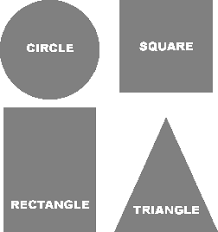

Download data at https://www.kaggle.com/smeschke/four-shapes/data

In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation, Dropout

Using TensorFlow backend.


In [2]:

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(128, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection

classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 4, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [3]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/home/vijay/Desktop/Studies/Data world/github/keras/Data/shapes/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/home/vijay/Desktop/Studies/Data world/github/keras/Data/shapes/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')



Found 14970 images belonging to 4 classes.
Found 14970 images belonging to 4 classes.


In [4]:
classifier.fit_generator(training_set,
                         steps_per_epoch = (14970/32),
                         epochs = 2,
                         validation_data = test_set,
                         validation_steps =( 14970/32))

Epoch 1/2
468/467 [==============================] - 109s 232ms/step - loss: 0.0929 - acc: 0.9611 - val_loss: 4.1213e-05 - val_acc: 1.0000
Epoch 2/2
468/467 [==============================] - 105s 225ms/step - loss: 0.0073 - acc: 0.9985 - val_loss: 6.1291e-06 - val_acc: 1.0000


In [5]:
training_set.class_indices

{'circle': 0, 'square': 1, 'star': 2, 'triangle': 3}

In [43]:

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/home/vijay/Desktop/Studies/Data world/github/keras/Data/shapes/single/3.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

if result[0][0] == 1:
    prediction = 'circle'
elif result[0][1] == 1:
    prediction = 'square'
elif result[0][2] == 1:
    prediction = 'star'
else:
    prediction='triangle'

In [44]:
prediction

'triangle'